**Airline Customer Satisfaction Analysis**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
flynetplus = pd.read_excel("Excel_CSAT.xlsx", sheet_name="FlyNetPlus")


In [5]:
flynetplus.head(1)

,id,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,4,3,3,3,...,3,2,5,4,5,5,2,5.0,4,5


In [7]:
def check_df(dataframe):
    print(f"""
        ##################### Shape #####################\n\n\t{dataframe.shape}\n\n
        ##################### Types #####################\n\n{dataframe.dtypes}\n\n
        ##################### Head #####################\n\n{dataframe.head(5)}\n\n
        ##################### Tail #####################\n\n{dataframe.tail(5)}\n\n
        ##################### NA #####################\n\n{dataframe.isnull().sum()}\n\n
        """)
check_df(flynetplus)


        ##################### Shape #####################

	(103904, 24)


        ##################### Types #####################

id                                     int64
Gender                                object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanlines

**Satisfaction Analysis of Business Class Passengers**

Filter the data to include only passengers with Class = Business.

Calculate the average scores for the following satisfaction criteria:

Seat comfort,Cleanliness,Inflight wifi service,On-board service,Food and drink

Identify the highest and lowest average scoring criteria.


In [8]:
df=flynetplus

In [11]:
df[df["Class"]=="Business"][["Seat comfort","Cleanliness","Inflight wifi service","On-board service","Food and drink"]].mean()

Seat comfort             2.879311
Cleanliness              3.477680
Inflight wifi service    3.608557
On-board service         3.679533
Food and drink           3.323789
dtype: float64

Above, we can see the average satisfaction scores out of 5 for our touchpoints. On-board service has the highest average score, while seat comfort has the lowest.

In [14]:
business_df = df[df["Class"] == "Business"].drop(columns=["id", "NPS"])

df_avg = business_df.mean(numeric_only=True).reset_index()
df_avg.columns = ["Category", "mean"]

df_cor = business_df.corr(numeric_only=True)["satisfaction"].drop("satisfaction").reset_index()
df_cor.columns = ["Category", "Correlation"]

df_corr_avg = pd.merge(df_avg, df_cor, on="Category").sort_values(by="Correlation", ascending=False)



In [15]:
df_corr_avg.sort_values(by="Correlation",ascending=False)

,Category,mean,Correlation
2,Inflight wifi service,3.608557,0.650547
9,Inflight entertainment,2.841015,0.597927
10,On-board service,3.679533,0.559018
11,Leg room service,3.647015,0.520843
14,Inflight service,4.185604,0.495320
7,Online boarding,3.727414,0.489956
15,Cleanliness,3.477680,0.485854
4,Ease of Online booking,2.956086,0.468448
3,Departure/Arrival time convenient,2.951656,0.439694
12,Baggage handling,4.326125,0.415039


**Analyze the Relationship Between Flight Distance and Class Type**

In [16]:
df.pivot_table(index="Class",values="Flight Distance", aggfunc="mean")

,Flight Distance
Class,
Business,1675.976925
Eco,743.439748
Eco Plus,747.125567


According to the pivot table above, Business Class corresponds to the longest average flight distances.

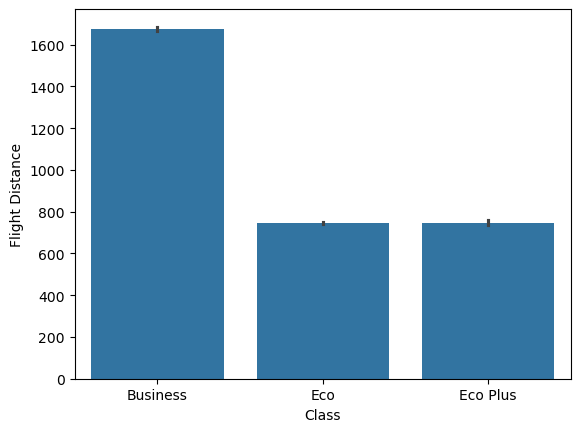

In [18]:
sns.barplot(df,x="Class", y="Flight Distance");

**Satisfaction Analysis by Age and Gender (Using 4 Criteria)**

Divide the Age column into 10-year intervals (e.g., 10–19, 20–29, 30–39...).

Select four of the following criteria for analysis:

Seat comfort,
Inflight wifi service,
Cleanliness,
On-board service,
Food and drink,
Check-in service, etc.

Calculate the average satisfaction scores broken down by age group and gender (Male, Female).


In [19]:
df["Age Segment"]=pd.cut(df["Age"],bins=[0,19,29,39,49,59,69],labels=["0-19","20-29","30-39","40-49","50-59","60+"],right=True)

In [21]:
df.groupby(["Age Segment","Gender"],as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})

C:\Users\Behiye\AppData\Local\Temp\ipykernel_38316\162868117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age Segment","Gender"],as_index=False).agg({"Seat comfort":"mean","Inflight entertainment":"mean", "Inflight wifi service":"mean", "Cleanliness":"mean", "On-board service":"mean", "Leg room service":"mean", "Checkin service":"mean"})


,Age Segment,Gender,Seat comfort,Inflight entertainment,Inflight wifi service,Cleanliness,On-board service,Leg room service,Checkin service
0,0-19,Female,2.323228,2.374423,3.344710,3.079101,3.213210,3.196346,3.190122
1,0-19,Male,2.289114,2.352856,3.428394,3.062914,3.202815,3.206540,3.215232
2,20-29,Female,2.389244,2.421658,3.416910,3.180789,3.226625,3.206812,3.211194
3,20-29,Male,2.409657,2.459245,3.478217,3.211905,3.273138,3.229372,3.272034
4,30-39,Female,2.545463,2.563087,3.476905,3.235499,3.323230,3.328847,3.228721
5,30-39,Male,2.574332,2.596496,3.513066,3.271003,3.342818,3.319106,3.248548
6,40-49,Female,2.868276,2.758520,3.620364,3.409539,3.539175,3.498246,3.392917
7,40-49,Male,2.796315,2.775503,3.625043,3.436370,3.553395,3.574548,3.413596
8,50-59,Female,2.939831,2.789617,3.603990,3.412828,3.570668,3.474668,3.425259
9,50-59,Male,2.811857,2.752781,3.603882,3.436306,3.537985,3.583316,3.430850


<Axes: xlabel='Age Segment', ylabel='Inflight wifi service'>

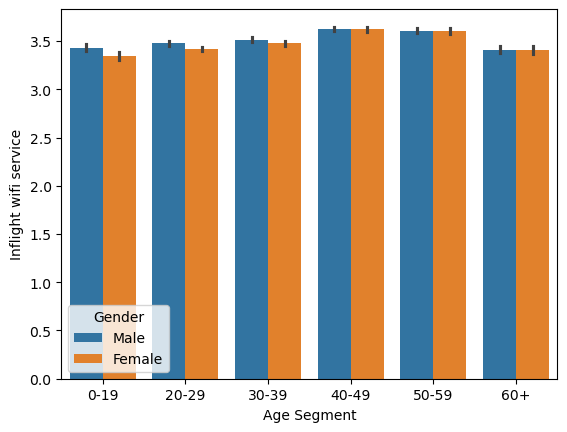

In [26]:
sns.barplot(df,x="Age Segment",y="Inflight wifi service",hue="Gender")

**Analyze the Relationship Between Departure/Arrival Time Convenience and Delays & Flight Distance**

Analyze how the variable Departure/Arrival time convenient relates to:

Flight Distance,
Departure Delay in Minutes,
Arrival Delay in Minutes


<Axes: xlabel='Flight Distance', ylabel='Departure/Arrival time convenient'>

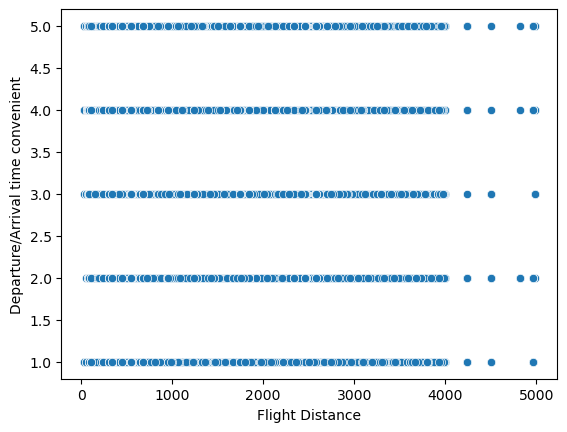

In [28]:
sns.scatterplot(data=df, x="Flight Distance", y="Departure/Arrival time convenient")


<Axes: xlabel='Departure Delay in Minutes', ylabel='Departure/Arrival time convenient'>

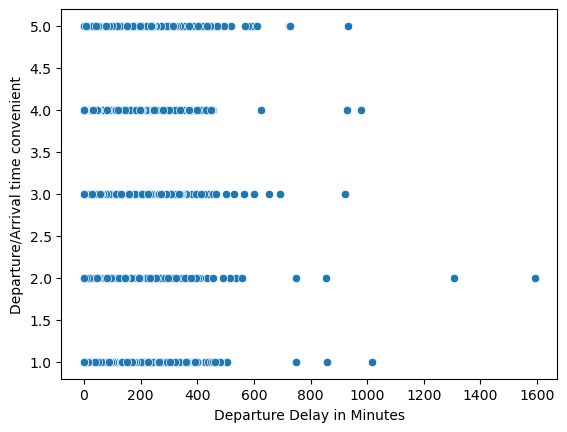

In [29]:
sns.scatterplot(data=df, x="Departure Delay in Minutes", y="Departure/Arrival time convenient")

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure/Arrival time convenient'>

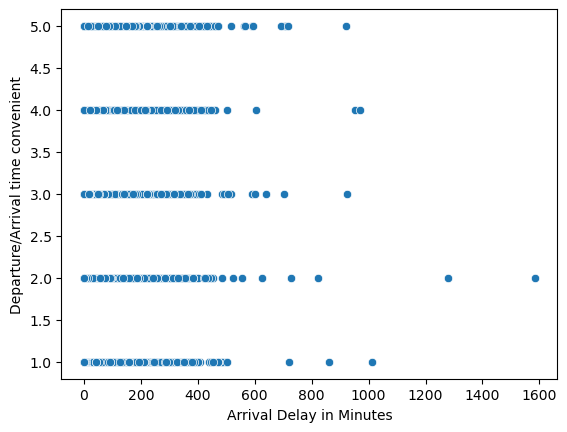

In [30]:
sns.scatterplot(data=df, x="Arrival Delay in Minutes", y="Departure/Arrival time convenient")

**Analyze the Relationship Between Seat Comfort and Delays & Flight Distance**

Analyze how Seat comfort is related to:
Flight Distance,
Departure Delay in Minutes,
Arrival Delay in Minutes


<Axes: >

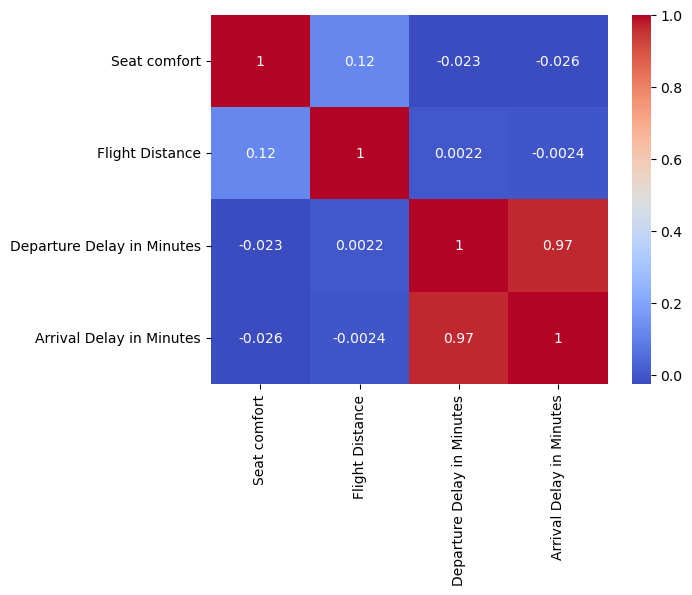

In [31]:
cols = ['Seat comfort', 'Flight Distance', 
        'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_corr=df[cols]
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
